# Feature Selection for LogisticRegressionCV

In [2]:
import os

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [3]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [12]:
from sklearn.preprocessing import QuantileTransformer

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [38]:
import pandas as pd
import numpy as np

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.compose import make_column_selector
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

In [41]:
df = pd.read_csv('s3://covidstatedata/final_dataset.csv')
pd.set_option("display.max_columns", None)

df1 = df.dropna()

Below is all of our original features other than those collinear with the target 

In [668]:
X = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Median Household Income', 'Population', 'Life Expectancy', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
        '# Black', '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]


y = df1['Dem0_Rep1']

In [669]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
def score_model_test(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
    
def visualize_model_split(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

In [670]:
#Change this and above scalers for other models

models = [
    LogisticRegressionCV(cv=3), 
]

F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574


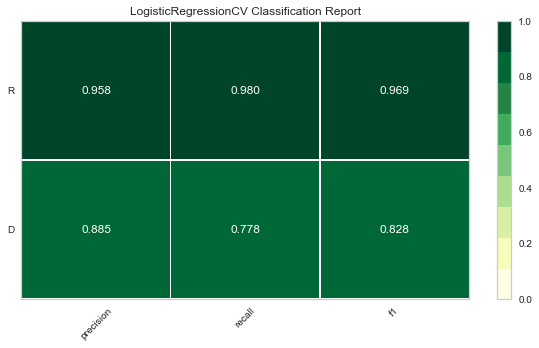

In [671]:
for model in models:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)

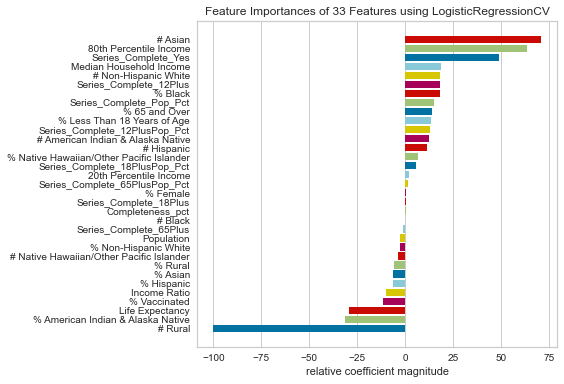

<AxesSubplot:title={'center':'Feature Importances of 33 Features using LogisticRegressionCV'}, xlabel='relative coefficient magnitude'>

In [672]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(models[0])
viz.fit(X, y)
viz.show()

In [673]:
modelsCVscore = [
    LogisticRegressionCV(cv=2), 
    LogisticRegressionCV(cv=3), 
    LogisticRegressionCV(cv=4), 
    LogisticRegressionCV(cv=5), 
    LogisticRegressionCV(cv=6), 
    LogisticRegressionCV(cv=7),
    LogisticRegressionCV(cv=8), 
    LogisticRegressionCV(cv=9), 
    LogisticRegressionCV(cv=10), 
    LogisticRegressionCV(cv=20), 
    LogisticRegressionCV(cv=50),  
]

In [674]:
for model in modelsCVscore:
    score_model_test(X, y, model)

F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574
F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574
F1 SCORE LogisticRegressionCV: 0.968054211035818
0.9459016393442623
F1 SCORE LogisticRegressionCV: 0.968054211035818
0.9459016393442623
F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574
F1 SCORE LogisticRegressionCV: 0.968054211035818
0.9459016393442623
F1 SCORE LogisticRegressionCV: 0.9671179883945841
0.9442622950819672
F1 SCORE LogisticRegressionCV: 0.968054211035818
0.9459016393442623
F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574
F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574
F1 SCORE LogisticRegressionCV: 0.968054211035818
0.9459016393442623


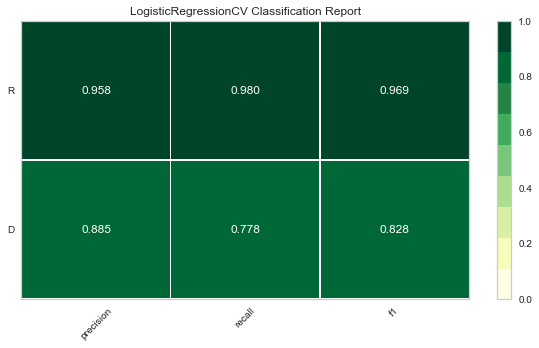

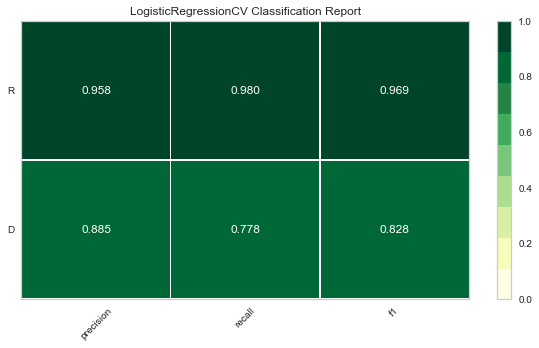

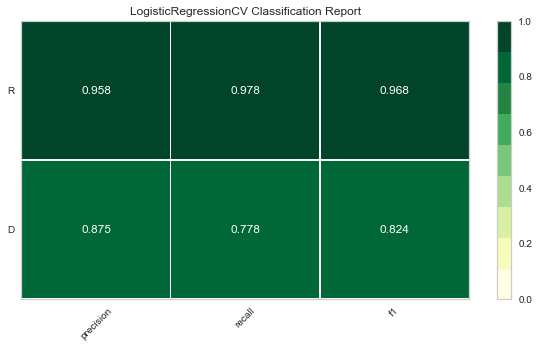

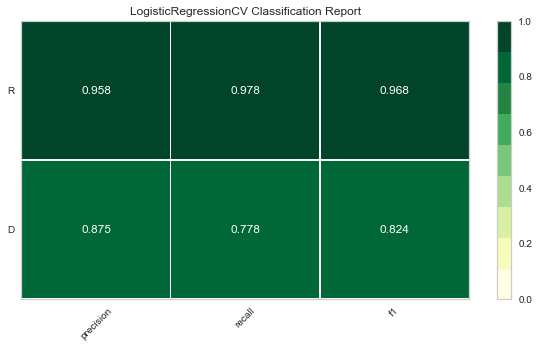

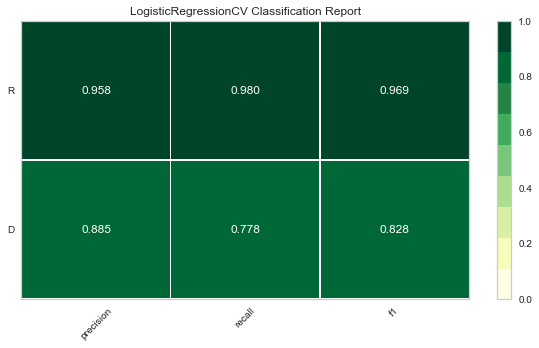

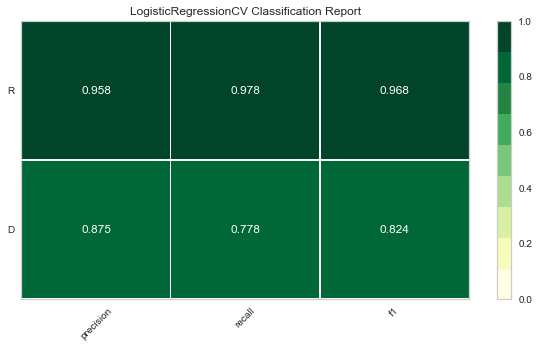

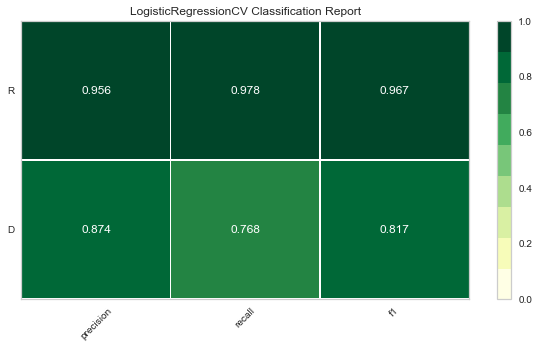

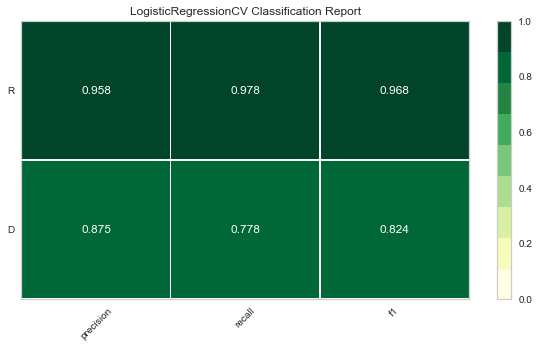

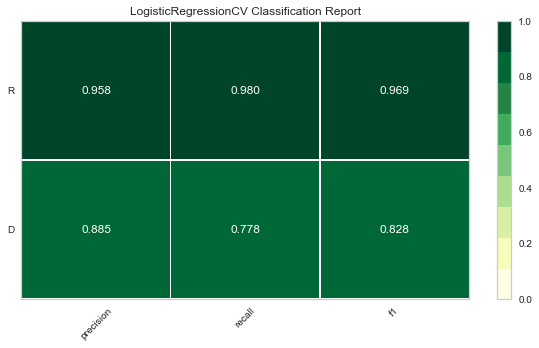

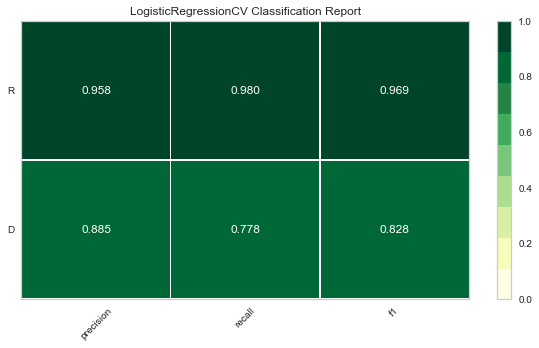

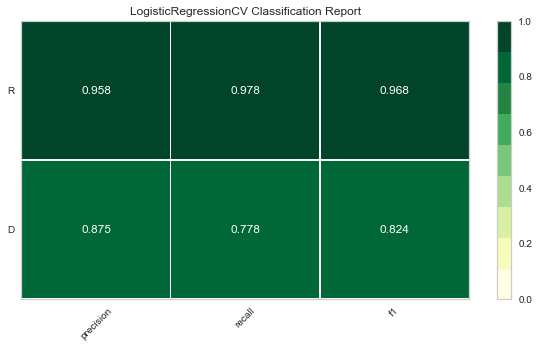

In [675]:
for model in modelsCVscore:
    visualize_model_split(X, y, model)

In [50]:
#LogisticRegressionCV(cv=2) seems to perform as best and as well as cv 3, 6, 10, 20

In [676]:
models = [
    LogisticRegressionCV(cv=2), 
]

F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574


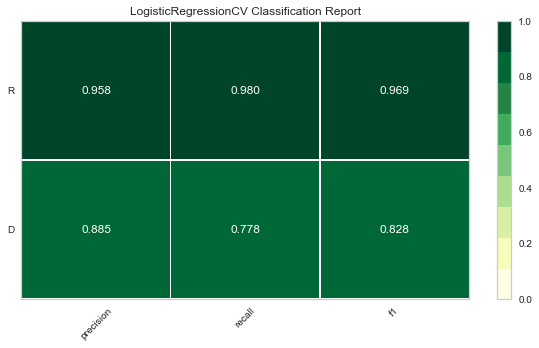

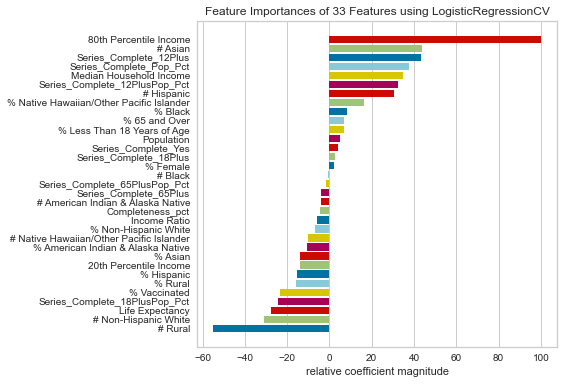

In [677]:
for model in models:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

# Recursive Feature Reduction

In [678]:
# remove #Black

In [679]:
X = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Median Household Income', 'Population', 'Life Expectancy', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
        '# Black', '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]


y = df1['Dem0_Rep1']

In [680]:
X1 = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Median Household Income', 'Population', 'Life Expectancy', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]


y1 = df1['Dem0_Rep1']

In [681]:
recursive = [
    LogisticRegressionCV(cv=2), 
]

F1 SCORE LogisticRegressionCV: 0.9700483091787439
0.9491803278688524


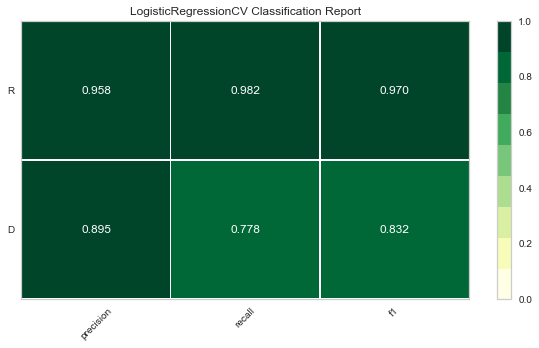

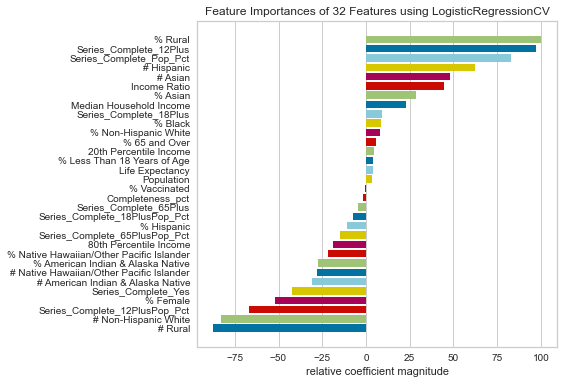

In [682]:
for model in recursive:
    score_model_test(X1, y1, model)
    visualize_model_split(X1, y1, model)
    viz = FeatureImportances(model)
    viz.fit(X1, y1)
    viz.show()

In [683]:
#performs better when # black is removed

In [684]:
X2 = df1[['80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Median Household Income', 'Population', 'Life Expectancy', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]


y2 = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9690522243713734
0.9475409836065574


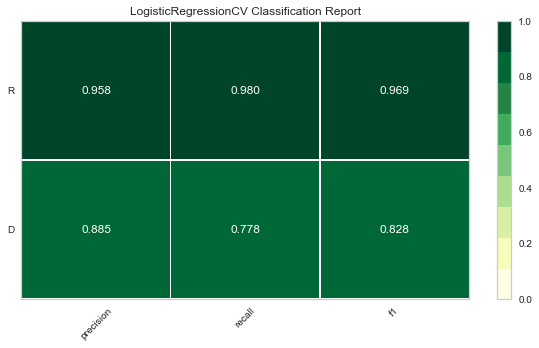

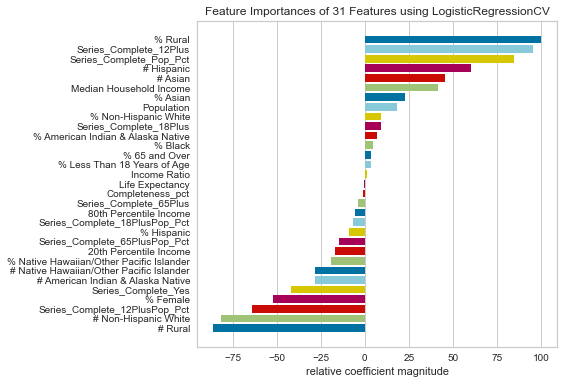

In [685]:
for model in recursive:
    score_model_test(X2, y2, model)
    visualize_model_split(X2, y2, model)
    viz = FeatureImportances(model)
    viz.fit(X2, y2)
    viz.show()

In [686]:
#performs a little worse when % Vaccinated is removed

In [687]:
X2 = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
         'Median Household Income', 'Population', 'Life Expectancy', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]

# 'Income Ratio',
y2 = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9691119691119691
0.9475409836065574


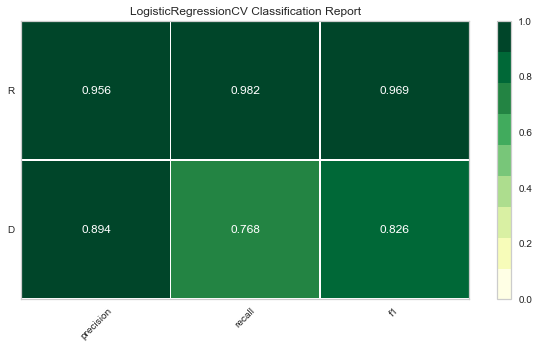

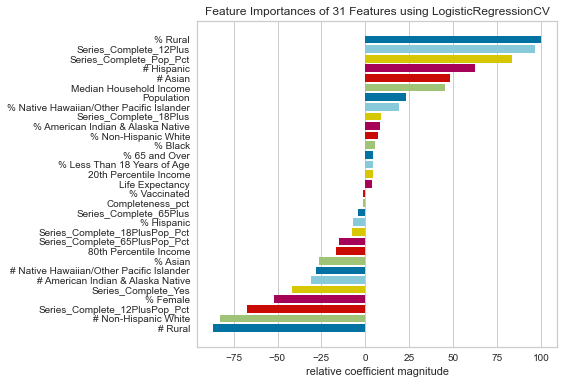

In [688]:
for model in recursive:
    score_model_test(X2, y2, model)
    visualize_model_split(X2, y2, model)
    viz = FeatureImportances(model)
    viz.fit(X2, y2)
    viz.show()

# Test Percent and Integer Colinear Features as Two Groups

In [693]:
#performs worse on recall when removed Income Ratio

In [694]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]

ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9728682170542635
0.9540983606557377


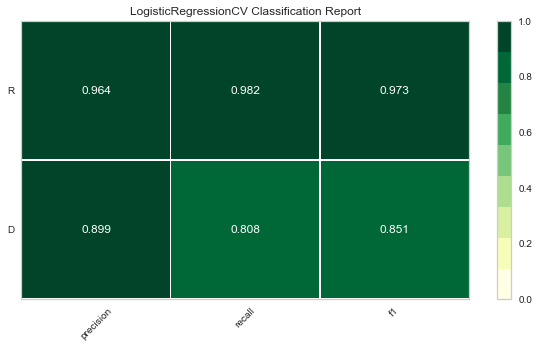

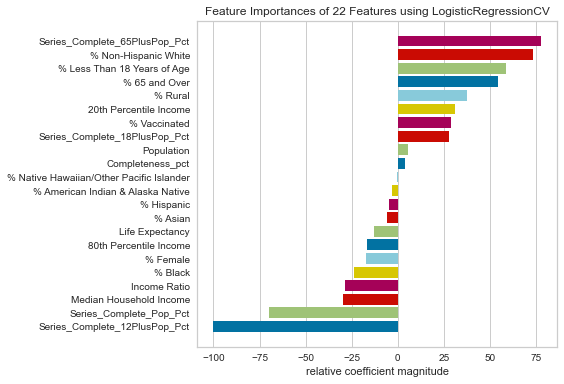

In [695]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

In [696]:
Xcount = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over',  
        '% Female', 'Series_Complete_Pop_Pct',
        '# Black', '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]

ycount = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9567723342939483
0.9262295081967213


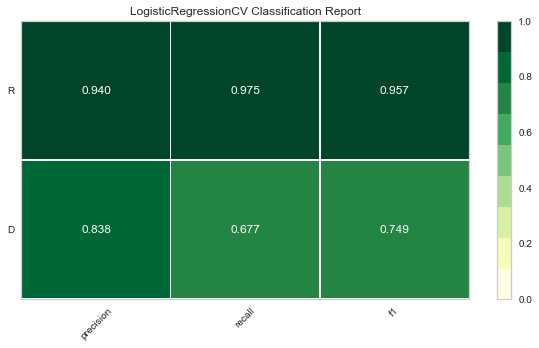

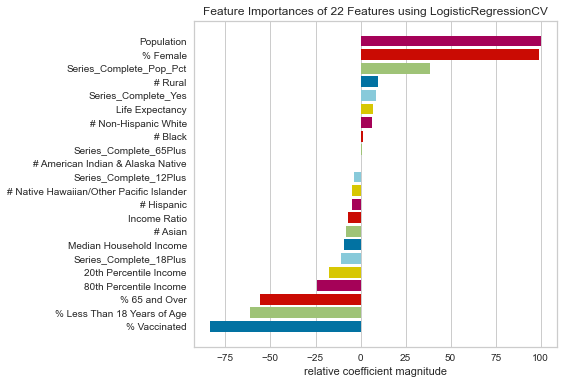

In [697]:
for model in recursive:
    score_model_test(Xcount, ycount, model)
    visualize_model_split(Xcount, ycount, model)
    viz = FeatureImportances(model)
    viz.fit(Xcount, ycount)
    viz.show()

In [698]:
# Model performs best when we keep percents but remove multi-colinear features

In [699]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]

ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9728682170542635
0.9540983606557377


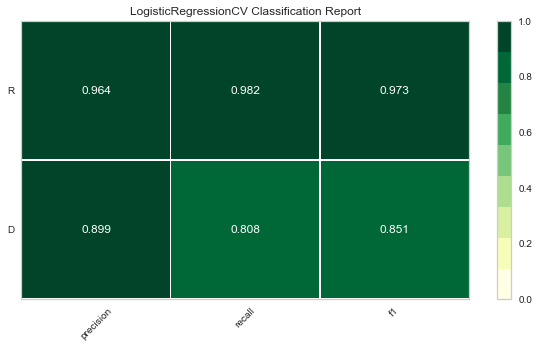

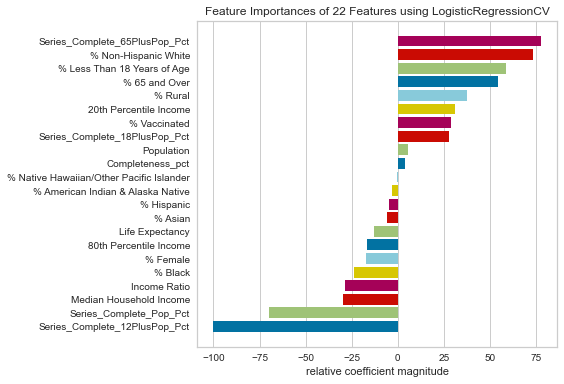

In [700]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

In [701]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian',  '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]
#'% Native Hawaiian/Other Pacific Islander',
ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9728682170542635
0.9540983606557377


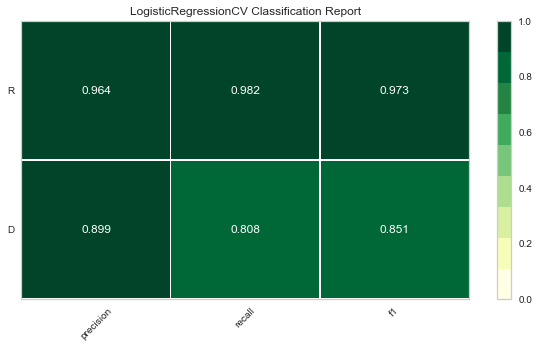

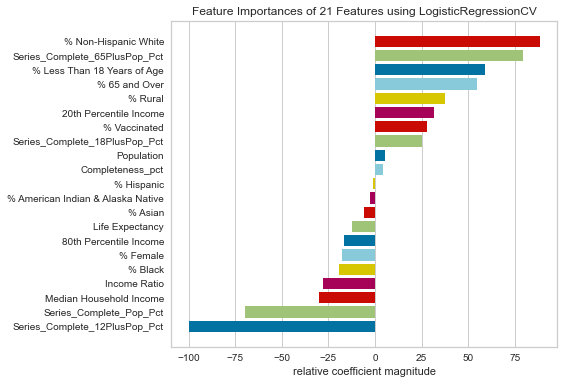

In [702]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

In [703]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian',  '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]
#'% Native Hawaiian/Other Pacific Islander',  '% Hispanic',
ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9728682170542635
0.9540983606557377


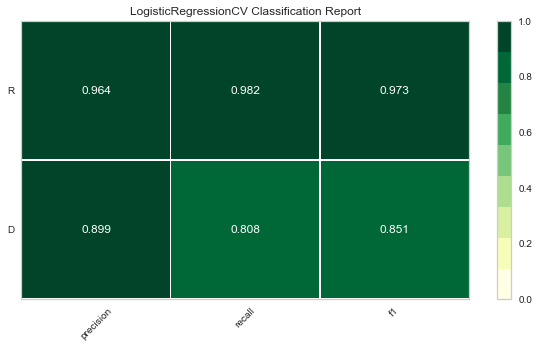

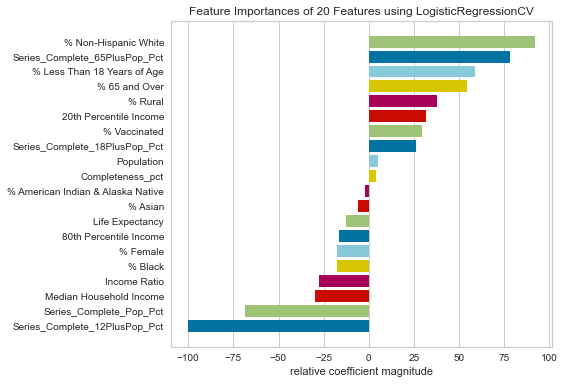

In [704]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

In [705]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', 
        '% Asian',  '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]
#'% Native Hawaiian/Other Pacific Islander',  '% Hispanic','% American Indian & Alaska Native', 
ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9748549323017408
0.9573770491803278


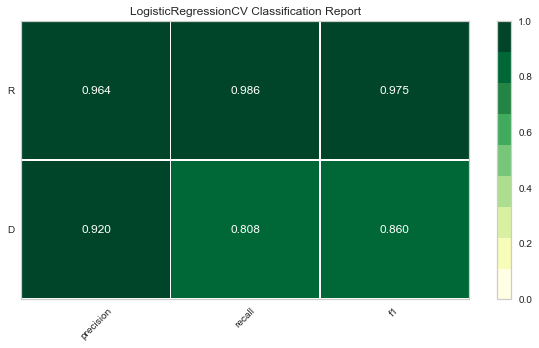

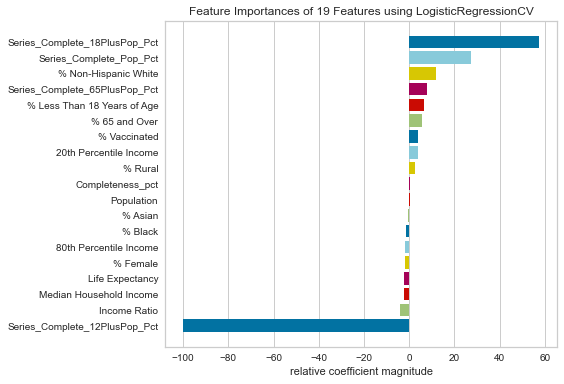

In [706]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

model has been performing better as we remove the population demographics, lets continue this before examining other features

In [707]:
## Removing % Asian or black makes the model perform worse, lets look at removing other features

In [708]:
Xpercent = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy',  'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', 
        '% Asian',  '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]
#Drop'% Native Hawaiian/Other Pacific Islander',  '% Hispanic','% American Indian & Alaska Native','Median Household Income',

#keep % black, asian and non-hispanic white, population, 'Completeness_pct' 80th and 20th percentile income, 
#keep %Female, %rural, income ratio, life expectancy, % less than 18, %65 and over


#
ypercent = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9748549323017408
0.9573770491803278


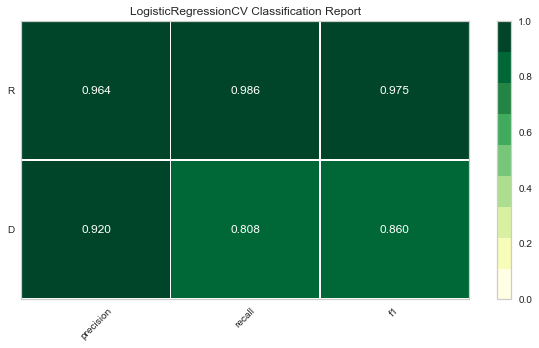

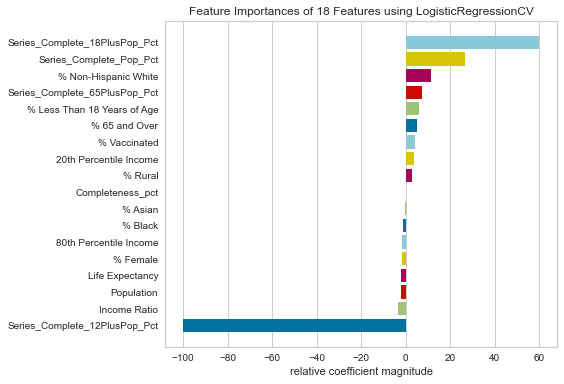

In [709]:
for model in recursive:
    score_model_test(Xpercent, ypercent, model)
    visualize_model_split(Xpercent, ypercent, model)
    viz = FeatureImportances(model)
    viz.fit(Xpercent, ypercent)
    viz.show()

After performing recursive feature reduction, we found the model to perform best when we include all these features

In [710]:
Xfinal = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Life Expectancy',  'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', 
        '% Asian',  '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
         
          ]]

yfinal = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9748549323017408
0.9573770491803278


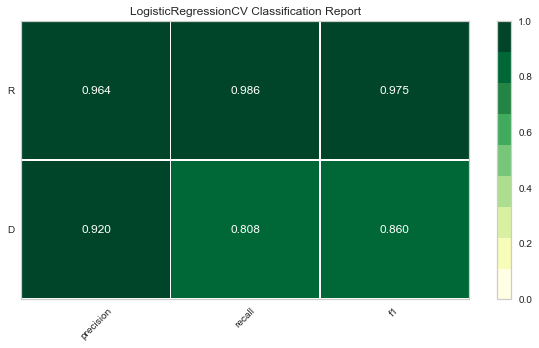

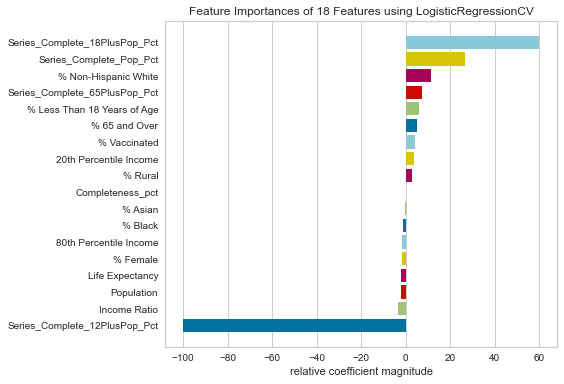

In [711]:
for model in recursive:
    score_model_test(Xfinal, yfinal, model)
    visualize_model_split(Xfinal, yfinal, model)
    viz = FeatureImportances(model)
    viz.fit(Xfinal, yfinal)
    viz.show()

# Recursive Feature Reduction Part 2

Now that we have eliminated features, lets see how models perform when we eliminate groups of data

In [712]:
X = df1[[
              #'% Vaccinated', 
              #'80th Percentile Income', 
              #'20th Percentile Income', 
              #'Income Ratio', 
              #'Life Expectancy', 
              #'Population', 
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', 
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


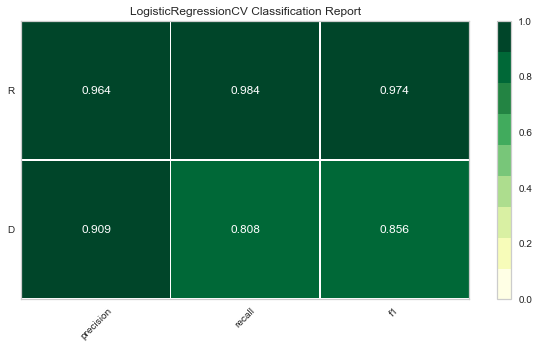

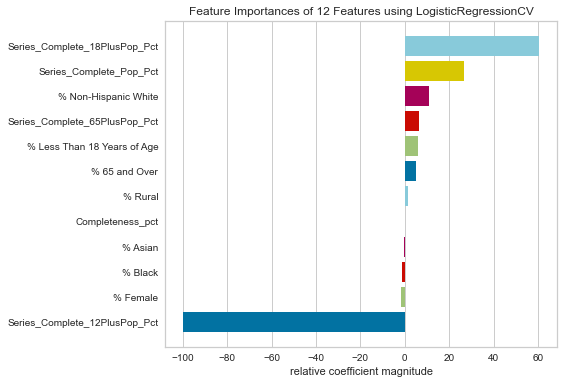

In [713]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [714]:
X = df1[[
              '% Vaccinated', 
              '80th Percentile Income', 
              '20th Percentile Income', 
              'Income Ratio', 
              'Life Expectancy', 
              'Population', 
              #'% Less Than 18 Years of Age',
              #'% 65 and Over', 
              #'% Black',  
              #'% Asian',  
              #'% Non-Hispanic White', 
              #'% Female', 
              #'% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.94062205466541
0.8967213114754098


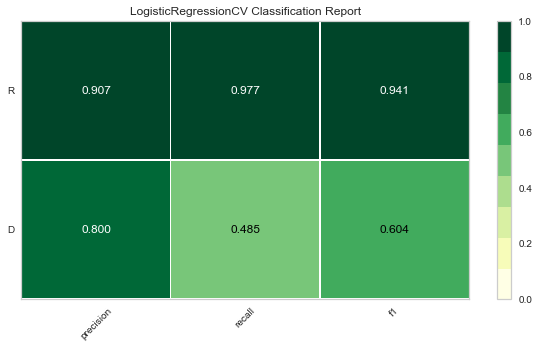

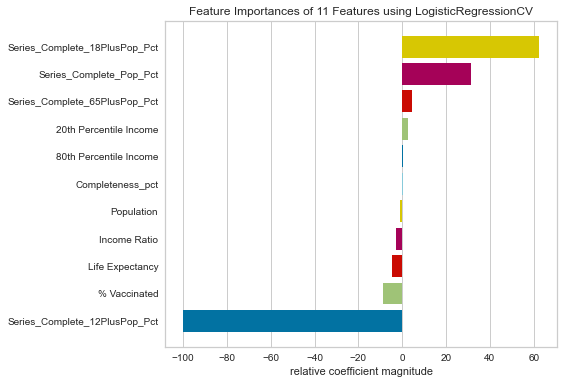

In [715]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [716]:
X = df1[[
              '% Vaccinated', 
              '80th Percentile Income', 
              '20th Percentile Income', 
              'Income Ratio', 
              'Life Expectancy', 
              'Population', 
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', 
              '% Female', 
              '% Rural', 
              #'Series_Complete_Pop_Pct', 
              #'Series_Complete_12PlusPop_Pct', 
              #'Series_Complete_18PlusPop_Pct',
              #'Series_Complete_65PlusPop_Pct', 
              #'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9557692307692308
0.9245901639344263


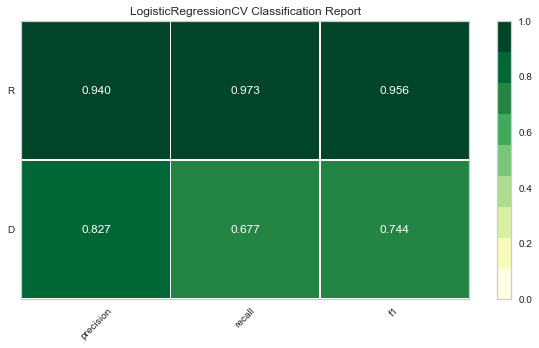

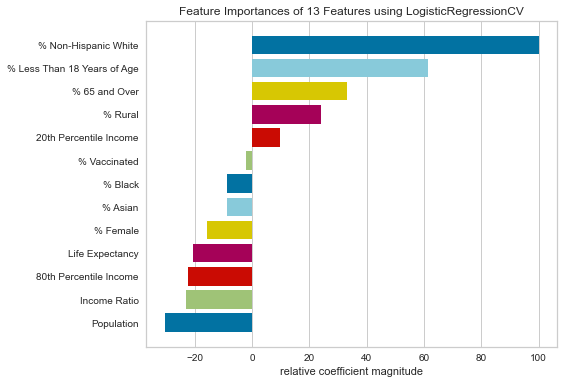

In [717]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

The ideal iteration of elimation was the first.. precision drops negligably for democrats, but we remove many features

In [718]:
X = df1[[
              #'% Vaccinated', 
              #'80th Percentile Income', 
              #'20th Percentile Income', 
              #'Income Ratio', 
              #'Life Expectancy', 
              #'Population', 
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', 
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


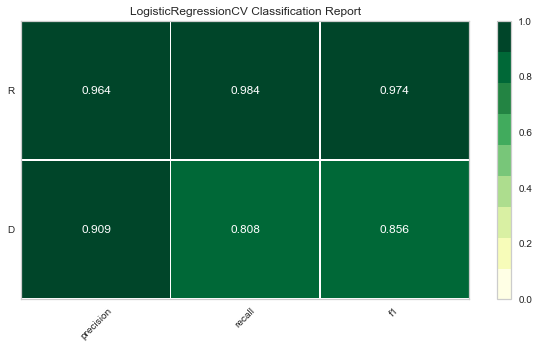

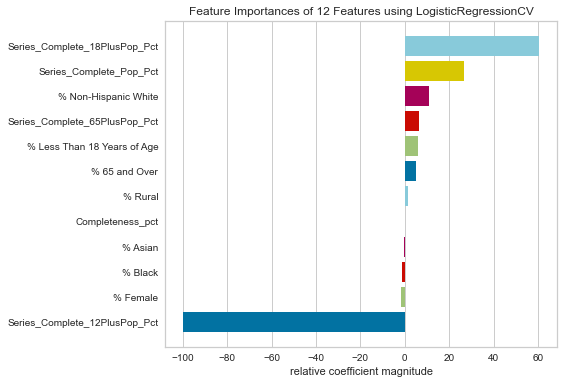

In [719]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

Does adding any back in help?

In [720]:
X = df1[[
              #'% Vaccinated', #NO
              #'80th Percentile Income', #NO
              #'20th Percentile Income', #NO
              #'Income Ratio', #NO
              #'Life Expectancy', #NO
              #'Population',  #NO
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', 
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


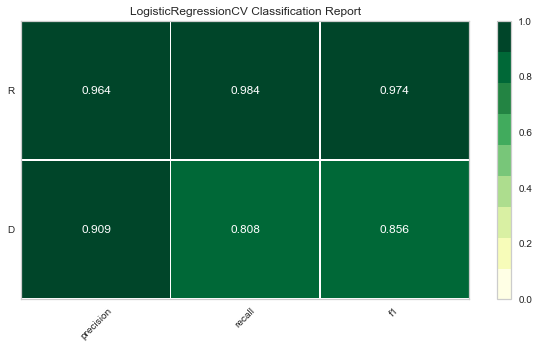

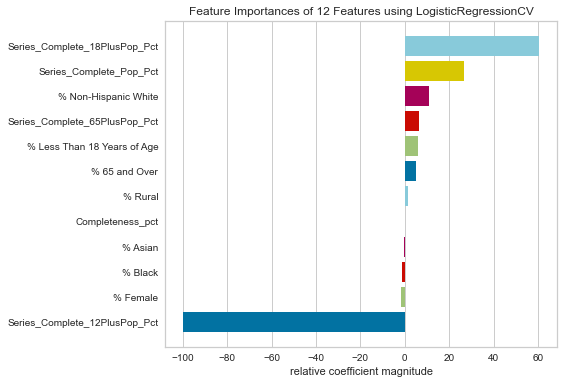

In [721]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [722]:
X = df1[[
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', #Drops the recall of Dem by 9% if removed
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


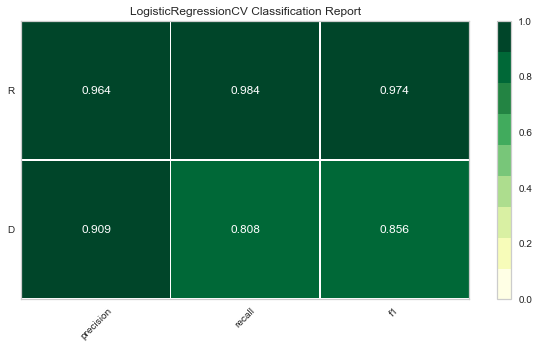

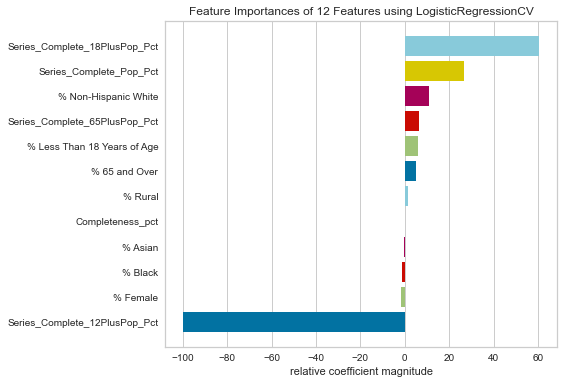

In [723]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [724]:
X = df1[[
             # '% Less Than 18 Years of Age', #no Change to recall
              #'% 65 and Over',  #Recall goes up .08ish
              #'% Black',  #Recall goes up 30ish
              #'% Asian',  #recall goes up 10
              #'% Non-Hispanic White', # Recall improves 30# for dem when added
              #'% Female', # slight improvement
              #'% Rural',  #Recall goes up 10
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9369202226345084
0.8885245901639345


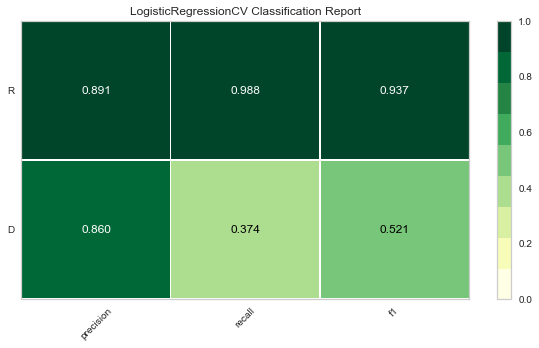

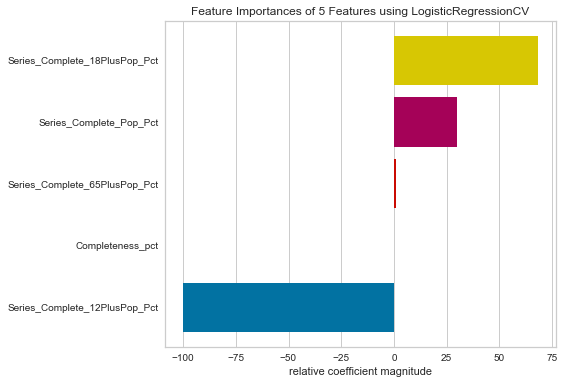

In [725]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [726]:
X = df1[[
             # '% Less Than 18 Years of Age', #no Change to recall
              #'% 65 and Over',  #Recall goes up .08ish
              #'% Black',  #Recall goes up 30ish
              #'% Asian',  #recall goes up 10
              '% Non-Hispanic White', # Recall improves 30# for dem when added
              #'% Female', # slight improvement
              #'% Rural',  #Recall goes up 10
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.9547641963426371
0.9229508196721311


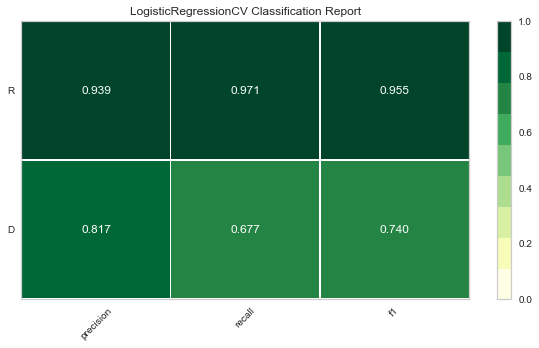

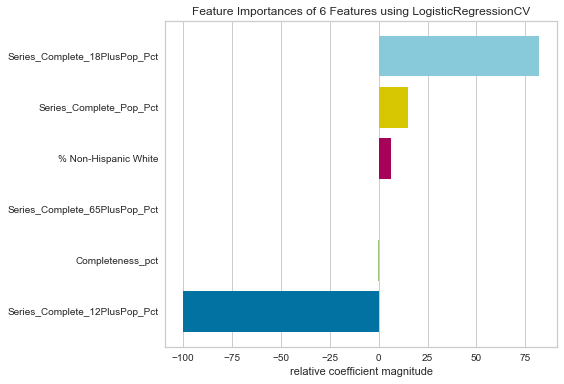

In [727]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

If we include covid vaccination data with simply the % of white people, then our models recall improves by more than .32 (it gets way better). A similar thing happens if we include only percent black people in the county.

However, the very best iteration of our model is when we include all the features which have a marginal effect on their own, but cummulate in the highest possible recall for democrats

In [728]:
X = df1[[
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', #Drops the recall of Dem by 9% if removed
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


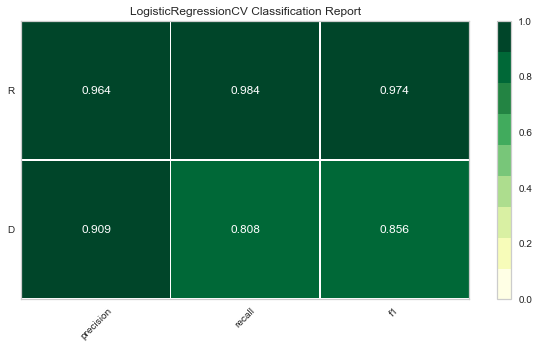

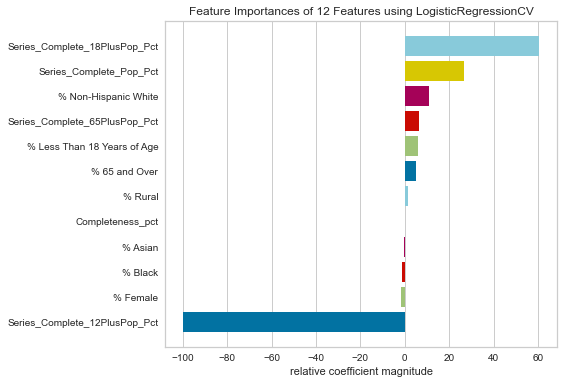

In [729]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

# Lets see how the model performs when we remove the vaccination = 0 data

In [730]:
df.sort_values('Series_Complete_Pop_Pct')

,Unnamed: 0,FIPS,state,county,% Vaccinated,80th Percentile Income,20th Percentile Income,Income Ratio,Life Expectancy,Median Household Income,Population,% Less Than 18 Years of Age,% 65 and Over,# Black,% Black,# American Indian & Alaska Native,% American Indian & Alaska Native,# Asian,% Asian,# Native Hawaiian/Other Pacific Islander,% Native Hawaiian/Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,% Female,# Rural,% Rural,Date,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,candidate,party,total_votes,won,% Joe,Dem0_Rep1
188,216,6063,California,Plumas,24.0,108400.0,24251.0,4.469919,78.724562,59376.0,18807,17.387143,28.909449,191,1.015579,596,3.169033,205,1.090020,32,0.170149,1750,9.305046,15627,83.091402,50.247248,14810.0,74.024092,06/16/2021,24,0.0,0,0,0.0,0,0.0,0,0.0,0.0,Donald Trump,REP,6445.0,True,0.414410,1
2697,2765,48487,Texas,Wilbarger,48.0,88431.0,17500.0,5.053200,75.584662,42570.0,12769,22.092568,18.959981,947,7.416399,205,1.605451,400,3.132587,9,0.070483,3806,29.806563,7265,56.895607,50.834051,2963.0,21.891393,06/16/2021,24,0.0,0,0,0.0,0,0.0,0,0.0,0.0,Donald Trump,REP,3524.0,True,0.213393,1
2698,2766,48489,Texas,Willacy,50.0,74495.0,13608.0,5.474353,77.549654,35821.0,21358,23.480663,14.313138,409,1.914973,153,0.716359,185,0.866186,14,0.065549,18908,88.528888,1820,8.521397,44.671786,7653.0,34.575766,06/16/2021,24,0.0,0,0,0.0,0,0.0,0,0.0,0.0,Joe Biden,DEM,3108.0,True,0.560101,0
2699,2767,48491,Texas,Williamson,52.0,151802.0,42697.0,3.555332,82.106826,92661.0,590551,25.223562,12.395542,39330,6.659882,5113,0.865802,47339,8.016073,928,0.157141,146602,24.824613,342586,58.011247,50.700617,50679.0,11.989950,06/16/2021,24,0.0,0,0,0.0,0,0.0,0,0.0,0.0,Joe Biden,DEM,143795.0,True,0.507170,0
2700,2768,48493,Texas,Wilson,39.0,140175.0,32266.0,4.344356,79.001528,76905.0,51070,23.814372,16.469552,758,1.484237,499,0.977090,334,0.654004,52,0.101821,20522,40.184061,28834,56.459761,49.810065,36850.0,85.861410,06/16/2021,24,0.0,0,0,0.0,0,0.0,0,0.0,0.0,Donald Trump,REP,18463.0,True,0.255914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,205,6041,California,Marin,50.0,247932.0,42948.0,5.772842,85.448621,112069.0,258826,19.832243,22.951326,6603,2.551135,2552,0.985991,17088,6.602119,712,0.275088,42160,16.288935,184116,71.135048,51.080262,16457.0,6.519974,06/16/2021,24,69.2,179171,178522,78.5,165707,79.9,50282,84.6,97.2,Joe Biden,DEM,128288.0,True,0.839032,0
1882,1947,37117,North Carolina,Martin,51.0,78891.0,16629.0,4.744182,75.345945,39413.0,22440,20.155971,23.939394,9327,41.564171,124,0.552585,121,0.539216,42,0.187166,916,4.081996,11732,52.281640,53.012478,19144.0,78.122832,06/16/2021,24,69.3,15546,15542,79.9,15312,85.5,6546,99.9,96.1,Donald Trump,REP,6532.0,True,0.475046,1
1782,1847,36041,New York,Hamilton,53.0,101167.0,24824.0,4.075371,78.851866,60148.0,4416,13.654891,31.861413,44,0.996377,15,0.339674,34,0.769928,4,0.090580,87,1.970109,4173,94.497283,50.000000,4836.0,100.000000,06/16/2021,24,70.9,3129,3129,76.8,3089,81.0,1377,97.9,97.4,Donald Trump,REP,2225.0,True,0.346165,1
1746,1811,35031,New Mexico,McKinley,51.0,78777.0,11502.0,6.848983,71.905907,36404.0,71367,28.143259,12.891112,329,0.460997,56815,79.609623,781,1.094343,36,0.050443,10148,14.219457,5930,8.309162,51.809660,41021.0,57.378448,06/16/2021,24,81.5,58169,58157,99.8,53248,99.9,11044,99.9,81.1,Joe Biden,DEM,18029.0,True,0.697987,0


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                3048 non-null   int64  
 1   FIPS                                      3048 non-null   int64  
 2   state                                     3048 non-null   object 
 3   county                                    3048 non-null   object 
 4   % Vaccinated                              3048 non-null   float64
 5   80th Percentile Income                    3048 non-null   float64
 6   20th Percentile Income                    3048 non-null   float64
 7   Income Ratio                              3048 non-null   float64
 8   Life Expectancy                           3048 non-null   float64
 9   Median Household Income                   3048 non-null   float64
 10  Population                          

In [732]:
#Below Does not perform as well

In [733]:
dropped = df[df['Series_Complete_18Plus']!=0]

In [734]:
X = dropped[[
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', #Drops the recall of Dem by 9% if removed
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = dropped['Dem0_Rep1']

F1 SCORE LogisticRegressionCV: 0.970464135021097
0.9496402877697842


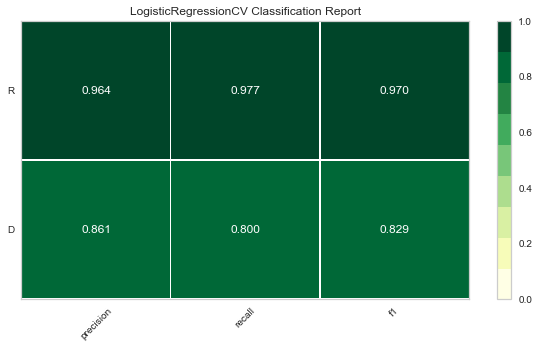

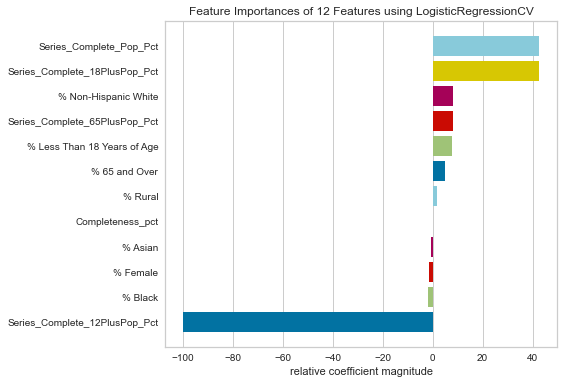

In [735]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [736]:
X = df1[[
              '% Less Than 18 Years of Age',
              '% 65 and Over', 
              '% Black',  
              '% Asian',  
              '% Non-Hispanic White', #Drops the recall of Dem by 9% if removed
              '% Female', 
              '% Rural', 
              'Series_Complete_Pop_Pct', 
              'Series_Complete_12PlusPop_Pct', 
              'Series_Complete_18PlusPop_Pct',
              'Series_Complete_65PlusPop_Pct', 
              'Completeness_pct', 
         
          ]]

y = df1['Dem0_Rep1']

# Final Model

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


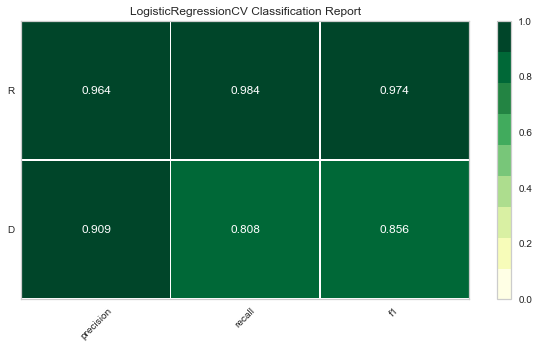

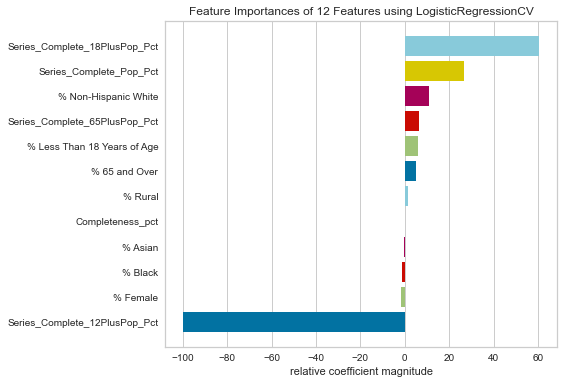

In [738]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

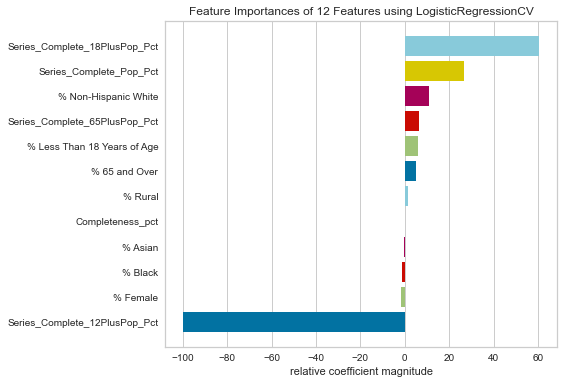

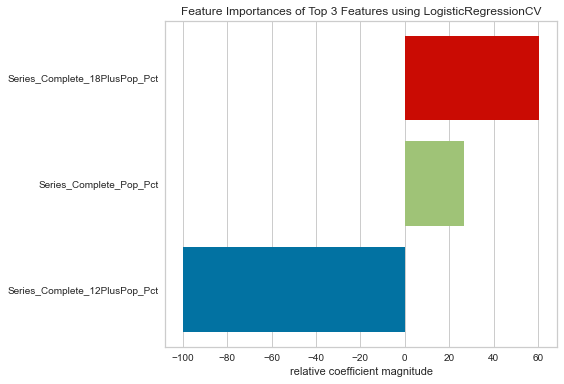

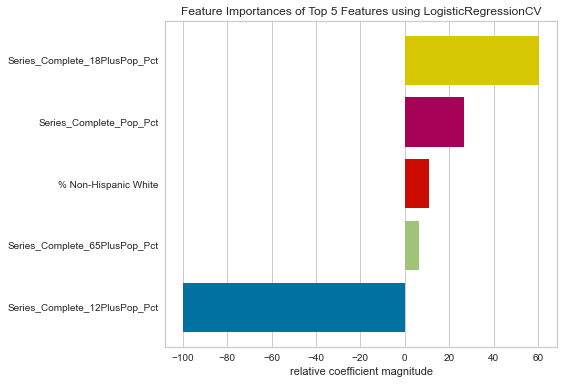


These are the bottom features Below





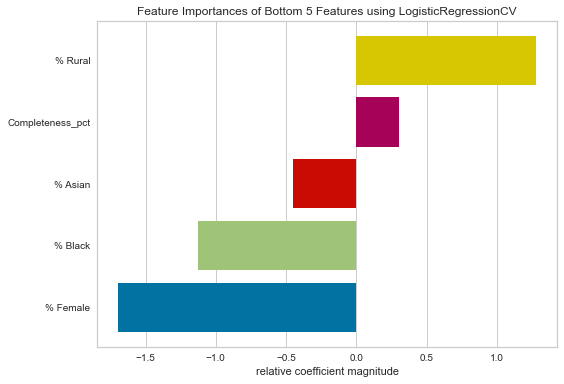

In [739]:
for model in recursive:
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()
    viz = FeatureImportances(model, topn=3)
    viz.fit(X, y)
    viz.show()
    viz = FeatureImportances(model, topn=5)
    viz.fit(X, y)
    viz.show()
    print()
    print('These are the bottom features Below')
    print()
    print()
    print()
    viz = FeatureImportances(model, topn=-5)
    viz.fit(X, y)
    viz.show()

# Retest CV Scores

In [742]:
modelsCVscore2 = [
    LogisticRegressionCV(cv=2), 
    LogisticRegressionCV(cv=3), 
    LogisticRegressionCV(cv=4), 
    LogisticRegressionCV(cv=5), 
    LogisticRegressionCV(cv=6), 
    LogisticRegressionCV(cv=7),
    LogisticRegressionCV(cv=8), 
    LogisticRegressionCV(cv=9), 
    LogisticRegressionCV(cv=10), 
    LogisticRegressionCV(cv=20), 
    LogisticRegressionCV(cv=50),  
]

In [743]:
for model in modelsCVscore2:
    score_model_test(X, y, model)
    #visualize_model_split(X, y, model)
    #viz = FeatureImportances(model)
    #viz.fit(X, y)
    #viz.show()

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328
F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427
F1 SCORE LogisticRegressionCV: 0.9718719689621726
0.9524590163934427


In [744]:
from yellowbrick.classifier import PRCurve

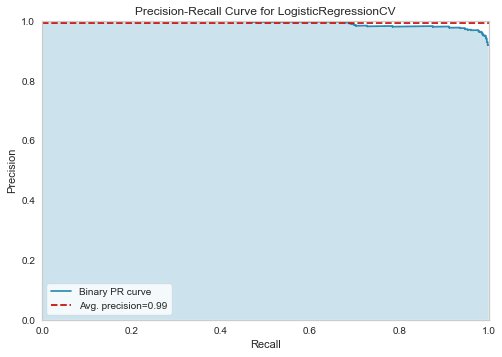

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegressionCV'}, xlabel='Recall', ylabel='Precision'>

In [745]:
viz = PRCurve(LogisticRegressionCV(cv=2))
              
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [746]:
from yellowbrick.classifier import confusion_matrix


In [747]:
def confusion(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer = confusion_matrix(
        model,
        X_train, y_train, X_test, y_test,
        classes=['Dem', 'Rep']
        )
    plt.tight_layout()
    
    
    
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

F1 SCORE LogisticRegressionCV: 0.973862536302033
0.9557377049180328


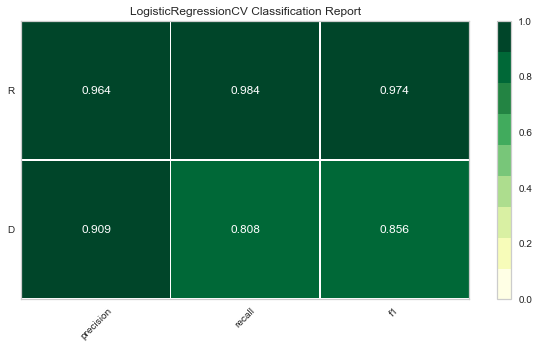

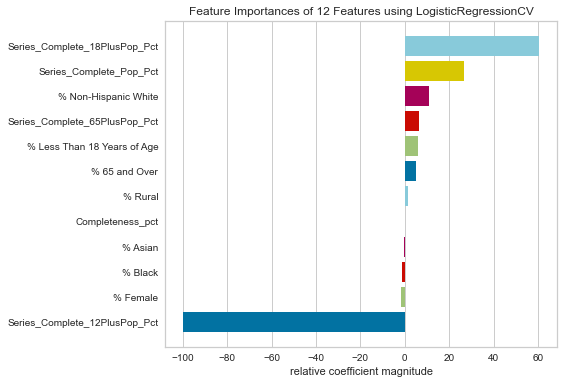

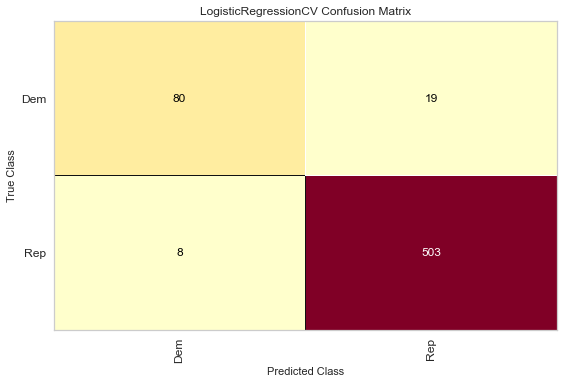

<Figure size 576x396 with 0 Axes>

In [748]:
for model in recursive:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()
    confusion(X, y, model)